# Les bases

## Importation de Matplotlib

Comme les autres librairies que vous avez commencé à utiliser il existe une convention pour importer matplotlib 

In [1]:
# convention d'importation de matplotlib
import matplotlib.pyplot as plt

# convention d'importation de numpy
import numpy as np

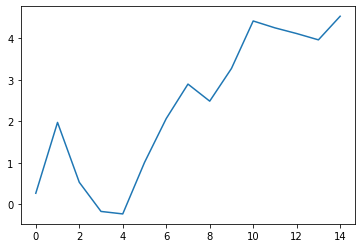

In [2]:
# Realiser un premier graphique !
x = np.random.randn(15).cumsum()
plt.plot(x)


## Structure d'un plot

Il est très important de comprendre comment un plot est structuré. 

![struct](https://res.cloudinary.com/practicaldev/image/fetch/s--dNi3F76s--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/rr39m52m6peef1drke7m.png)

Il existe trois notions de base :
- la `figure` : votre canvas pour dessiner  
- les `axes` : un espace du canvas pour dessiner vos données 
- les `axis` : les axes de la courbe, à ne pas confondre avec `axes`... eh oui, il semblerait que nos amis de matplotlib voulaient nous compliquer la vie!

Mais une courbe peut avoir plusieurs éléments : ![vocab](https://res.cloudinary.com/practicaldev/image/fetch/s--1x1epD95--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/b9psb0mtz7yk8qmfe26f.png)

Matplotlib est organisé à partir de 3 grandes couches:

- Backend layer, pour générer le rendu graphique de votre code.
- Artist layer, pour définir l'ensemble éléments d'un plot
- Scripting layer, pour simplifier la définition des éléments d'un plot.

![archi](img/img/mpl-layers.png)

**Il existe donc deux interfaces pour plotter avec Matplotlib** :

- Une interface simplifiée (scripting layer), à l'aide `pyplot` qui essaye de se rapprocher à Matlab.
- Une interface orientée objet (Artist layer), qui permet d'avoir une meilleure granularité pour faire des plots avancés.


# Plotter à l'aide de l'interface PyPlot

## Exercise - Tracer une ligne

Utiliser `pyplot` afin de créer un graphique qui ressemble à la figure ci dessous:

![exo1](img/img/ex1.png)


**Attention l'objectif n'est pas de reproduire la courbe, mais de mettre en place tous les composants et le style.**

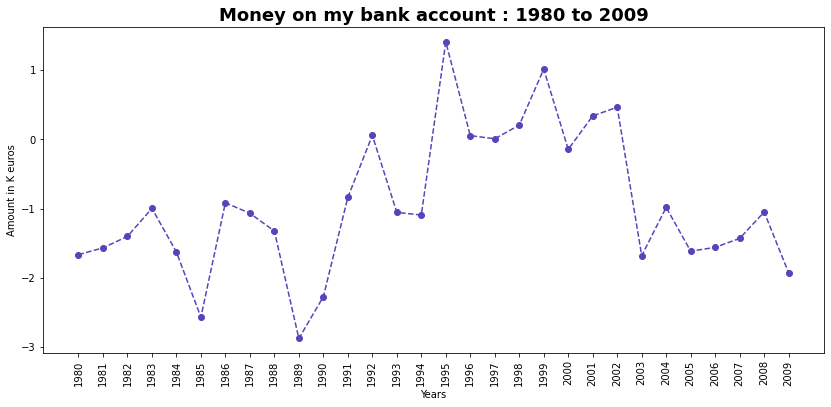

In [3]:
# Exo1 - Help 

# voici la variable à plotter
y = np.random.randn(30).cumsum()

# la taille de la figure est (14,6)
# la couleur de la ligne a le code RGB : #5445BA
# Pour le titre la font size est 18, font weight est "bold"
# Les labels des ticks sont en rotation de 90 degrées.

fig1 = plt.figure(figsize=(14, 6))
ax = plt.axes()
x=[i for i in range(1980,2010)]
plt.plot(x,y, 'o--',color='#5445BA')
plt.title('Money on my bank account : 1980 to 2009', fontsize= 18, fontweight="bold")
plt.ylabel('Amount in K euros')
plt.xlabel('Years')
plt.xticks(x,rotation=90)
plt.show()


## Exercise  - Tracer un histogramme

A l'aide de la fonction `plt.hist()` tracez un histogramme qui resemble (dans sa structure) à l'image suivante.

![exo2](img/img/ex2.png)

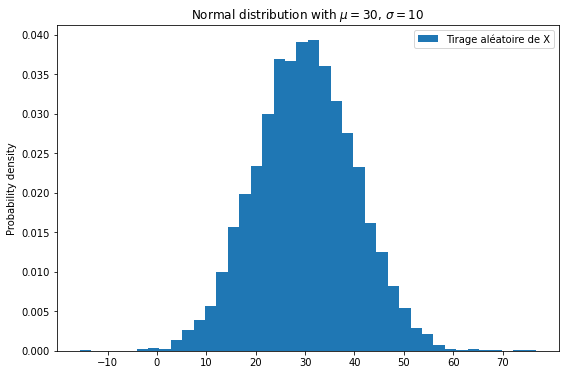

In [4]:
# Help exo 2

# creer une distribution de 10 000 valeurs suivant une loie normale centrée sur mu=30 avec un écart-type de sigma=10 
mu, sigma = 30, 10
x = np.random.normal(loc=mu, scale=sigma, size=10000)

# figsize=(9,6)
# histogramme avec 40 bins. y présente la densité au lieu des valeurs !
# n'oublies pas la legende !

xticks=[i for i in range(-10,80,10)]
plt.figure(figsize=(9,6))
plt.hist(x, bins=40, density=True)# on veut la densité et pas le nombre d'occurences
plt.title('Normal distribution with $\mu = 30$, $\sigma = 10$') # notation scientifique backslash 
plt.legend(['Tirage aléatoire de X'])
plt.ylabel('Probability density')
plt.xticks(xticks)
plt.show();

# Interlude : styles et parametrage

## Exercise  - Essayer autres styles

Il existe plusieurs styles graphiques pour le rendu de vos plots. Vous pouvez les connaitre à l'aide de l'attribut `plt.style.available` 

Essayer différents styles backend et observez les résultats sur la cellule ci-dessous. 

Voici un exemple de rendu avec le style `seaborn` :

![exo3](img/img/ex3.png)

Un des principes de la visualisation est *less is more*. **Quel style vous semble rendre le graphique moins chargé,  donc plus lisible ?**

In [5]:
# Quels styles sont disponibles ?
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

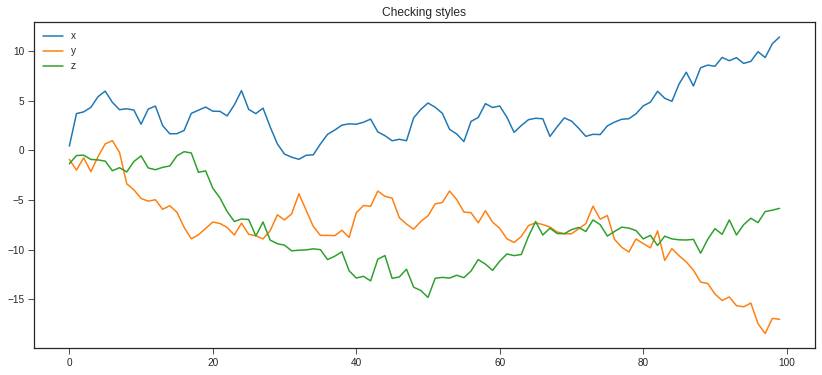

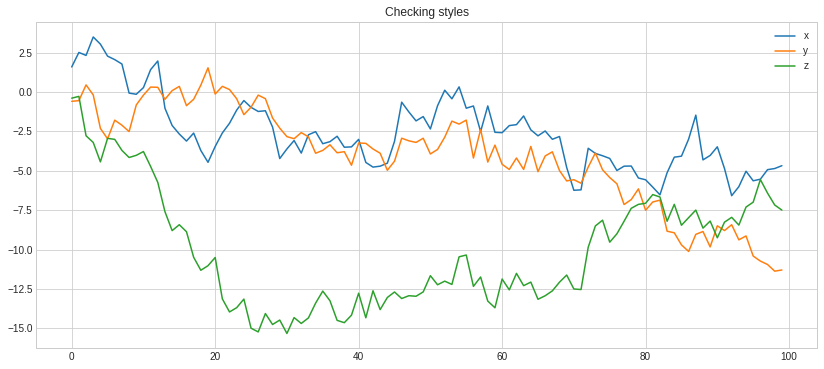

In [6]:
# Changez le style !

# Style playing
plt.figure(figsize=(14,6))

plt.style.use('seaborn-ticks')
plt.plot(np.random.randn(100).cumsum(), label="x")
plt.plot(np.random.randn(100).cumsum(), label="y")
plt.plot(np.random.randn(100).cumsum(), label="z")
plt.title("Checking styles")

plt.legend()
plt.show()

# Style playing
plt.figure(figsize=(14,6))

plt.style.use('seaborn-whitegrid')
plt.plot(np.random.randn(100).cumsum(), label="x")
plt.plot(np.random.randn(100).cumsum(), label="y")
plt.plot(np.random.randn(100).cumsum(), label="z")
plt.title("Checking styles")

plt.legend()
plt.show()


## Exercise  : Changez les parametres 

Matplotlib propose un ensemble de parametres par défaut qui sont bien pratiques. Mais souvent on se retrouve à répéter toujours la meme instruction. 

Le cas typique est la taille par défaut d'une figure. Lorsque nous sommes sur notre notebook nous avons regulirement besoin d'une figure de plus grand taille.

Les parametres sont stockés dans un `dict()`, ce dictionnaire est l'attribut `rcParams` de `plt`.

- Explorez rapidement ce dictionnaire.
- Changez le parametre de la taille de figure par défaut vers qq chose qui vous convient.  
- Nous allons par la suite utiliser le style seaborn, mais le background attire trop l'oeil. Changez le facecolor. Comme par exemple la couleur RGB `#f2f2f2` ou alors `#f1f3f9`.

Voici un exemple de ce que cela peut donner.

![exo4](img/img/ex4.png)

In [7]:
# Changez les parametre par défaut
plt.rcParams.update({'figure.figsize':(10, 5)})
plt.rcParams.update({'figure.facecolor':'#f2f2f2'})

Figure(1008x432)


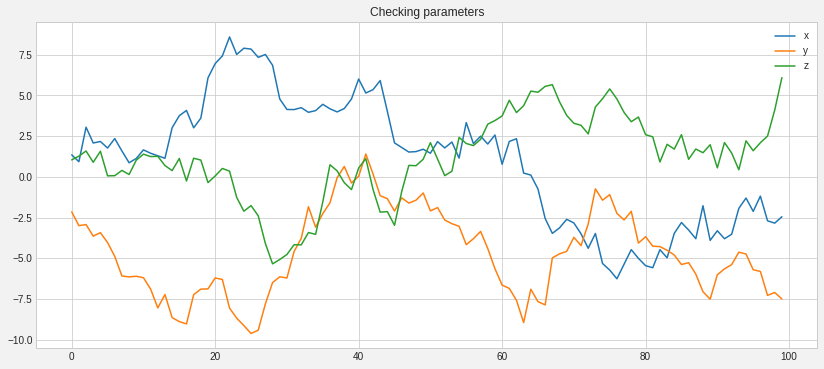

Figure(576x396)


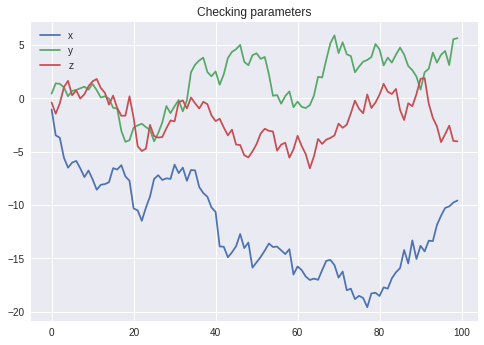

In [8]:
# Vérifier l'échange de vos parametrage de Matplotlib
ax = plt.figure(figsize=(14,6))

plt.plot(np.random.randn(100).cumsum(), label="x")
plt.plot(np.random.randn(100).cumsum(), label="y")
plt.plot(np.random.randn(100).cumsum(), label="z")
plt.title("Checking parameters")
plt.style.use('seaborn')
print(ax)
plt.legend()
plt.show()

ax = plt.figure()

plt.plot(np.random.randn(100).cumsum(), label="x")
plt.plot(np.random.randn(100).cumsum(), label="y")
plt.plot(np.random.randn(100).cumsum(), label="z")
plt.title("Checking parameters")
plt.style.use('seaborn')
print(ax)
plt.legend()
plt.show()

# Plotter avec l'interface Artist.

`pyplot` est une interface qui permet de travailler sur des cas de visualisation faciles. 
Mais des que nous souhaitons aller plus loin, l'interface trouve ses limites.

Le cas le plus courant est lorsque nous souhaitons tracer plusieurs graphiques (a.k.a. `axes`) dans le meme canvas (a.k.a. `figure`).

Pour tracer des subplots, nous devons travailler directement avec les objets de la classe `Figure` et `Axes`. Ce que l'on appelle bosser directement sur les objets de la couche *Artist*. 

Voici un exemple :

```python
    fig = plt.figure() # créer un objet de type Figure (canvas)
    ax = fig.add_subplot(nrows, ncols, plot_number) # creér un objet de type Axes
```

- `nrows` et `ncols` decoupe la figure en (`nrows` \* `ncols`) sub-axes,  
- `plot_number` est l'identifiant d'un plot particulier. 

**Remarque** `plot_number` commence à 1, et fini à `nrows` \* `ncols` 

L'image suivante devrait vous aider à comprendre la logique des subplots :

![subplots](img/img/subplots.png "source: IBM")


## Exercise : Faire des subplots

Reproduisez avec exactitude la figure suivante.

![exo5](img/img/ex5.png)

Quelques pistes :

- Il s'agit d'une grille 2x2
- Pour le texte sur 4ème axes rajoutez du texte à l'aide de la fonction `text` qui se trouve dans l'objet du type `Axes`.
- La couleur du texte est `green`

https://matplotlib.org/stable/gallery/pyplots/text_commands.html

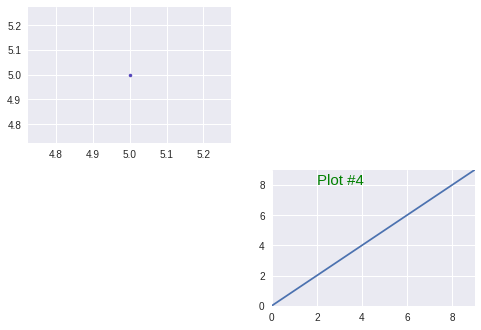

In [10]:
# TODO Exercise subplot
x1=range(0,10)
y4=x1
x4=range(0,9,2)

fig = plt.figure() 

ax0 = fig.add_subplot(2, 2, 1) 
ax0.plot(5,5,linestyle="-", color = "#5445BA", marker = ".")

ax1 = fig.add_subplot(2, 2, 4)
ax1.text(2, 8,"Plot #4",fontsize = 15, c = 'green')
ax1.plot(y4,linestyle="-")
ax1.axis([0, 9, 0, 9])
ax1.set_xticks(x4);

## Exercise  : 'Traduction' de pyplot à artist

Traduisez le code suivant vers l'interface objet de matplotlib

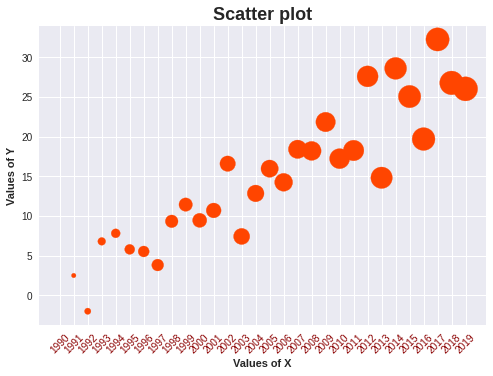

In [11]:
x5 = np.arange(30)
y5 = np.arange(30) + 3*np.random.randn(30)

plt.scatter(x5 , y5 , color="orangered", s=20*x5)

plt.title("Scatter plot", fontsize=18, fontweight="bold")
plt.xlabel("Values of X", fontweight="bold")
plt.ylabel("Values of Y", fontweight="bold")
plt.xticks(x5, labels=x5 + 1990, rotation=45, color="darkred")
plt.show()

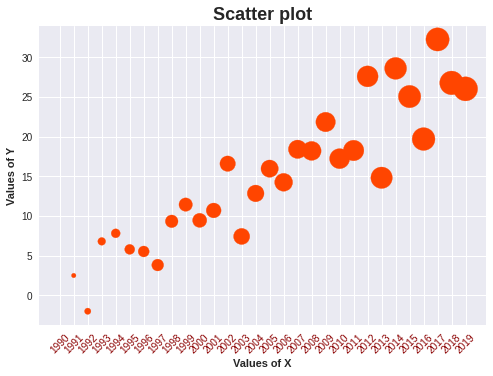

In [12]:
# Utiliser la méthode artiste
fig, ax = plt.subplots() # ce n'est pas subplot comme avant 
ax.scatter(x5 , y5 , color="orangered", s=20*x5)
ax.set_title("Scatter plot", fontsize=18, fontweight="bold")
ax.set_xlabel("Values of X", fontweight="bold")
ax.set_ylabel("Values of Y", fontweight="bold")
ax.set_xticks(x5, labels=x5 + 1990, rotation=45, color="darkred")
plt.show()

https://matplotlib.org/stable/gallery/color/named_colors.html# Pour aller plus loin

- L'histoire de Matplotlib
    - https://matplotlib.org/stable/users/project/history.html
 
- Les styles, le parametrage et les couleurs
    - https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
    - https://matplotlib.org/stable/tutorials/introductory/customizing.html
    - https://matplotlib.org/stable/gallery/color/named_colors.html
    
- La difference entre pyplot and axes
	- https://stackoverflow.com/questions/37970424/what-is-the-difference-between-drawing-plots-using-plot-axes-or-figure-in-matpl
    
- The Artist interface
    - https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo

- Exemple d'une entreprise qui fait de la visu son coeur métier
    - https://www.darkhorseanalytics.com/portfolio-all
    - http://babynames.dha.io/
